<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [47]:
import re
import string

from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [ ]:
nlp = spacy.load("en_core_web_md")

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [16]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
#text = soup.get_text() #method to extract all text out of html
# 1-2 commands to get cleaned
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
                


In [2]:
from bs4 import BeautifulSoup
import requests

In [17]:
df = pd.read_csv("data/job_listings.csv")

In [18]:
text_desc = []

for i in df['description']:
    text_desc.append(BeautifulSoup(i, 'html.parser').get_text())

text_desc = pd.Series(text_desc, name='text')
text_desc

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: text, Length: 426, dtype: object

In [19]:
df['text'] = text_desc
df2 = df[['title', 'text']]
df2

,title,text
0,Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...
...,...,...
421,Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an..."
422,2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ..."
423,Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a..."
424,Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB..."


## 2) Use Spacy to tokenize the listings 

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [20]:
tokens = []

for i in df['text']:
    doc = nlp(i)
    tokens.append([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])
    
tokens

[['b"Job',
  'Requirements:\\nConceptual',
  'understanding',
  'Machine',
  'Learning',
  'model',
  'like',
  'nai\\xc2\\xa8ve',
  'Bayes',
  'K',
  'Means',
  'SVM',
  'Apriori',
  'Linear/',
  'Logistic',
  'Regression',
  'Neural',
  'Random',
  'Forests',
  'decision',
  'tree',
  'K',
  'NN',
  'hand',
  'experience',
  '2',
  'them\\nIntermediate',
  'expert',
  'level',
  'coding',
  'skill',
  'Python',
  'R.',
  'ability',
  'write',
  'function',
  'clean',
  'efficient',
  'datum',
  'manipulation',
  'mandatory',
  'role)\\nexposure',
  'package',
  'like',
  'numpy',
  'scipy',
  'Pandas',
  'Matplotlib',
  'etc',
  'Python',
  'GGPlot2',
  'dplyr',
  'tidyR',
  'R\\nAbility',
  'communicate',
  'model',
  'finding',
  'Technical',
  'Non',
  'technical',
  'stake',
  'holders\\nhand',
  'experience',
  'SQL',
  'Hive',
  'similar',
  'programming',
  'language\\nMust',
  'past',
  'work',
  'GitHub',
  'Kaggle',
  'publish',
  'article\\nMaster',
  'degree',
  'Statisti

In [33]:
token = []

for i in df['text']:
    #text = i.split('\n')
    #doc = [t for t in text if len(t) > 0]
    doc = nlp(i)
    x = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    token.append(x[0])
    
token = pd.Series(token, name='token')
token
#text = text.split('\n')

0               b"Job
1               b'Job
2                b'As
3            b'$4,969
4          b'Location
            ...      
421           b"About
422    b'InternshipAt
423        b'$200,000
424          b"SENIOR
425          b'Cerner
Name: token, Length: 426, dtype: object

In [21]:
tokens = pd.Series(tokens, name='tokens')

In [22]:
df['tokens'] = tokens
df

,Unnamed: 0,description,title,text,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ...","[b""Job, Requirements:\nConceptual, understandi..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo...","[b'Job, Description\n\nAs, Data, Scientist, 1,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'As, Data, Scientist, work, consult, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."
...,...,...,...,...,...
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer,"b""About Us:\nWant to be part of a fantastic an...","[b""About, Us:\nWant, fantastic, fun, startup, ..."
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...,"b'InternshipAt Uber, we ignite opportunity by ...","[b'InternshipAt, Uber, ignite, opportunity, se..."
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance,"b'$200,000 - $350,000 a yearA million people a...","[b'$200,000, $, 350,000, yearA, million, peopl..."
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist,"b""SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...","[b""SENIOR, DATA, SCIENTIST\nJOB, DESCRIPTION\n..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [35]:
# IMPORT
#text = df['tokens']

# INSTANTIATE
vect = CountVectorizer()

# FIT
vect.fit(df['text'])

# TRANSFORM
dtm = vect.transform(df['text'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Word Counts
dtm.sum()

00             1
000           52
02115          1
03             2
0356           1
              ..
zillow         7
zones          1
zoom           1
zuckerberg     2
zurich         2
Length: 10069, dtype: int64

## 4) Visualize the most common word counts

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [42]:
df3 = pd.DataFrame(dtm.sum().sort_values())
top10 = df3.tail(10)
top10

,0
you,1505
or,1936
for,2059
with,3059
in,3594
data,4394
of,4611
the,5300
to,6913
and,11737


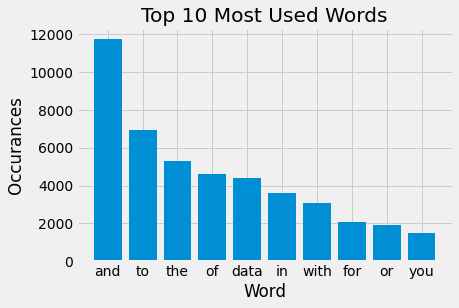

In [44]:
plt.style.use('fivethirtyeight')

x = ['and', 'to', 'the', 'of', 'data', 'in', 'with', 'for', 'or', 'you']
energy = [11737, 6913, 5300, 4611, 4394, 3594, 3059, 2059, 1936, 1505]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy)
plt.xlabel("Word")
plt.ylabel("Occurances")
plt.title("Top 10 Most Used Words")

plt.xticks(x_pos, x)

plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [46]:
# LOAD
# text = df['text']

# INSTANTIATE
tfid = TfidfVectorizer(stop_words='english', max_features=5000)

# FIT
# Transform
dtm = tfid.fit_transform(df['text'])

# Make it a nice dataframe
df4 = pd.DataFrame(dtm.todense(), columns=tfid.get_feature_names())

df4

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.043033,0.0,0.0,0.0,0.038609,0.0,0.0,0.0,0.0,0.0
422,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
423,0.118271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
424,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018824,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [ ]:
##### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [49]:
# LOAD already done with df4

# INSTANTIATE
model = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

# FIT (no transform here)
model.fit(df4)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [52]:
# LOAD
desc = """
super cool data scientist job description
doing internal tools and stuff
"""

# TRANSFORM
query = tfid.transform([desc])

# Search
model.kneighbors(query.todense())

(array([[1.30153902, 1.34242372, 1.34576426, 1.34576426, 1.34658652]]),
 array([[169, 271,  76, 172, 299]]))

In [57]:
#data[140]
print("TOP MATCH")
print(df['text'][149][:200])

print("SECOND MATCH")
print(df['text'][271][:200])

print("THIRD MATCH")
print(df['text'][76][:200])

print("FOURTH MATCH")
print(df['text'][172][:200])

print("FIFTH MATCH")
print(df['text'][299][:200])

TOP MATCH
b'$27.17 - $36.60 an hourAs a Data Scientist Graduate Intern for the CIA, you will work side-by-side with other Data Scientists to organize and interpret data to inform US decision makers, drive succe
SECOND MATCH
b"Purpose of Job We are currently seeking talented Data Scientist I for our San Antonio, TX facility.\n\nUses advanced techniques that integrate traditional and non-traditional datasets and method to 
THIRD MATCH
b'Title: Data Scientist\nThis role is designed for people who like to dig into data, figure out what matters, and communicate those insights to others. Fast.\nBackground\nAt numo, we create and incuba
FOURTH MATCH
b'Title: Data Scientist\nThis role is designed for people who like to dig into data, figure out what matters, and communicate those insights to others. Fast.\nBackground\nAt numo, we create and incuba
FIFTH MATCH
b'Company: AllazoHealth\nLocation: New York City\n\nAllazoHealth, one of the fastest growing health-tech startups in NYC, combines\nbeha

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 